In [6]:
! uv pip install face_recognition

Resolved 6 packages in 11.10s                                        
Prepared 4 packages in 3m 54s                                            
Installed 6 packages in 57ms                                
 + click==8.2.1
 + dlib==20.0.0
 + face-recognition==1.3.0
 + face-recognition-models==0.3.0
 + numpy==2.2.6
 + pillow==11.3.0


In [7]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

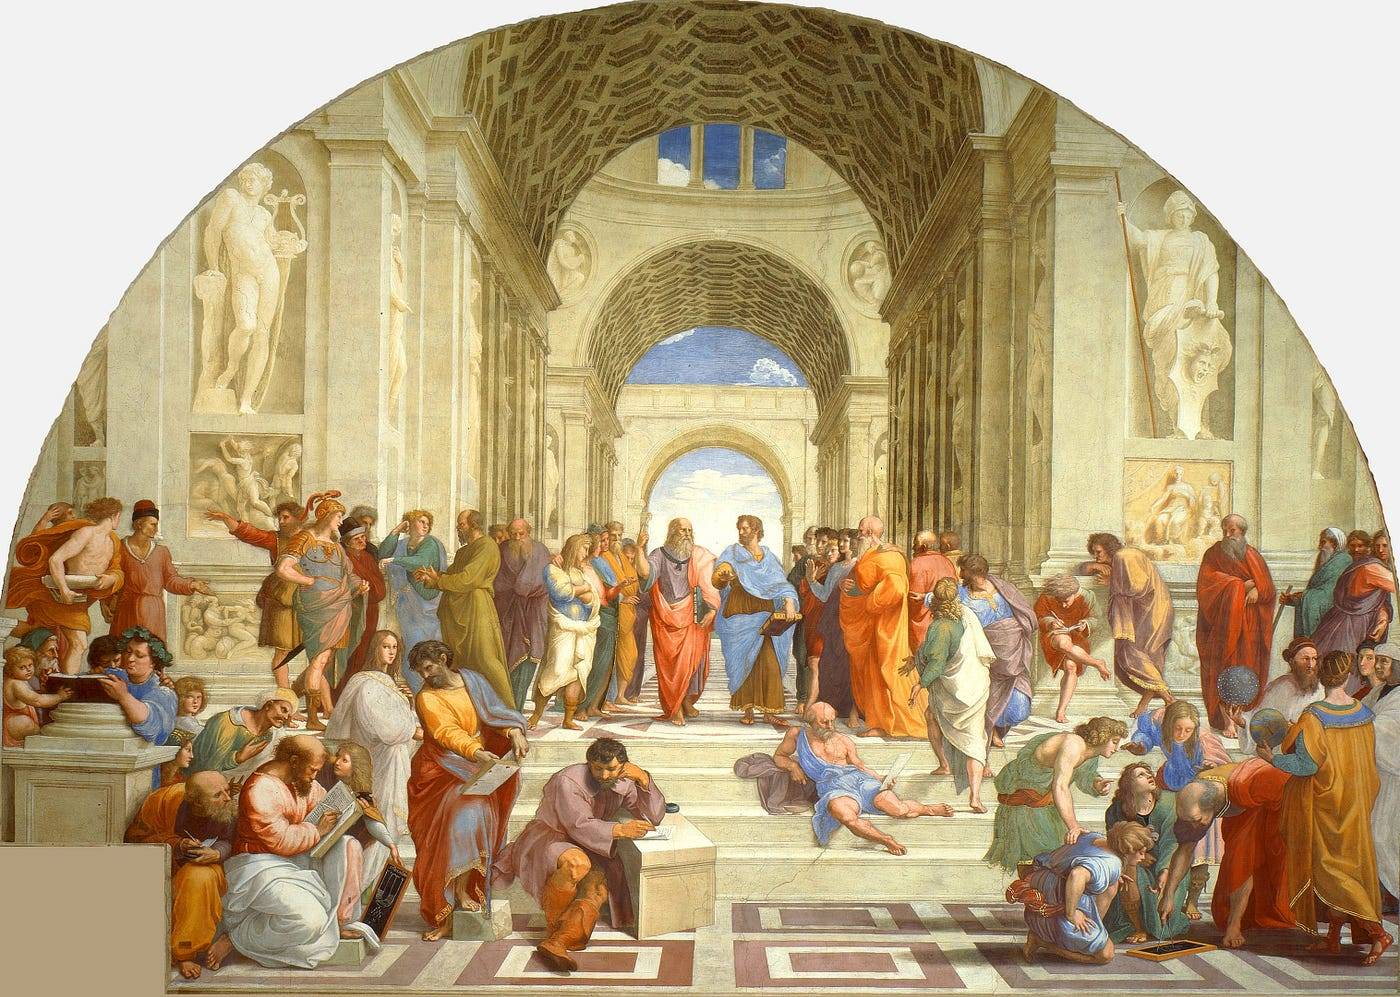

In [13]:
from PIL import Image, ImageDraw
from IPython.display import display
athens = "/home/ericb/thesis-edb/thesis/chapterimages/athens.jpg"
# The program we will be finding faces on the example below
pil_im = Image.open(athens)
display(pil_im)

In [240]:
people = {(7,5): "  Aristole",
          (7, 6): "",
 (1,6): "Epicurious",
           (1,7): "",
(6,5): "Plato",
          (6,6): "",
(4,5): "Socrates",
    (4,6): "",     
(8, 7): "Diogenes",
(11, 7):  "Euclid",
(11, 8):  "",
          (11, 9):  "",
(12, 7):  "",
(12, 8):  "",
          (12, 9):  "",
         (3, 7):  "Pythagoras",
                   (2, 7):  "",
          (2, 8):  "",
         (4, 7): "",
         (3, 8): "",
         (4, 8): "",
         # (4, 9): "",
          (3, 9): "",
         }

In [241]:
unknown_image = face_recognition.load_image_file(athens)
step = 100
nx = unknown_image.shape[0] // step
ny = unknown_image.shape[1] // step
nx+=1
ny+=1
for y in range(ny):
    for x in range(nx):
        if (y,x) in people.keys():
            _ = unknown_image[step*x:step*x+step,step*y:step*y+step,:]
            face_locations = face_recognition.face_locations(
                _)
            # print(y,x,face_locations)
            # import matplotlib.pyplot as plt
            # plt.imshow(_)
            # # plt.title(people[(y,x)])
            # plt.axis(False)
            # plt.show()
        else:
            unknown_image[step*x:step*x+step,
                step*y:step*y+step,:] = unknown_image[step*x:
                    step*x+step,step*y:step*y+step,:] * np.array(
                        (1,9,4)) + np.array(
                        (255/8,255/5,255/8)
                    ) 


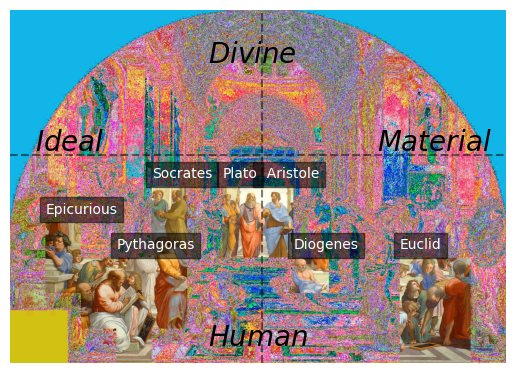

In [249]:
plt.imshow(unknown_image)
for k,v in people.items():
    t = plt.text( k[0]*step, k[1]*step - 25, v , color="white")
    t.set_bbox(dict(facecolor='black', alpha=0.5,))
plt.axis(False)
plt.axhline(4*step+10, color="k", alpha=0.5, linestyle="--")
plt.axvline(7*step+10, color="k", alpha=0.5, linestyle="--")

t = plt.text(0.4, 0.85, '$\it{Divine}$', transform=plt.gca().transAxes, fontsize=20)
t = plt.text(0.4, 0.05, '$\it{Human}$', transform=plt.gca().transAxes, fontsize=20)
t = plt.text( 0.74, 0.6, '$\it{Material}$', transform=plt.gca().transAxes, fontsize=20)
t = plt.text(0.05, 0.6, '$\it{Ideal}$', transform=plt.gca().transAxes, fontsize=20)
z
plt.savefig("athens2.png")

In [30]:
face_locations

[]

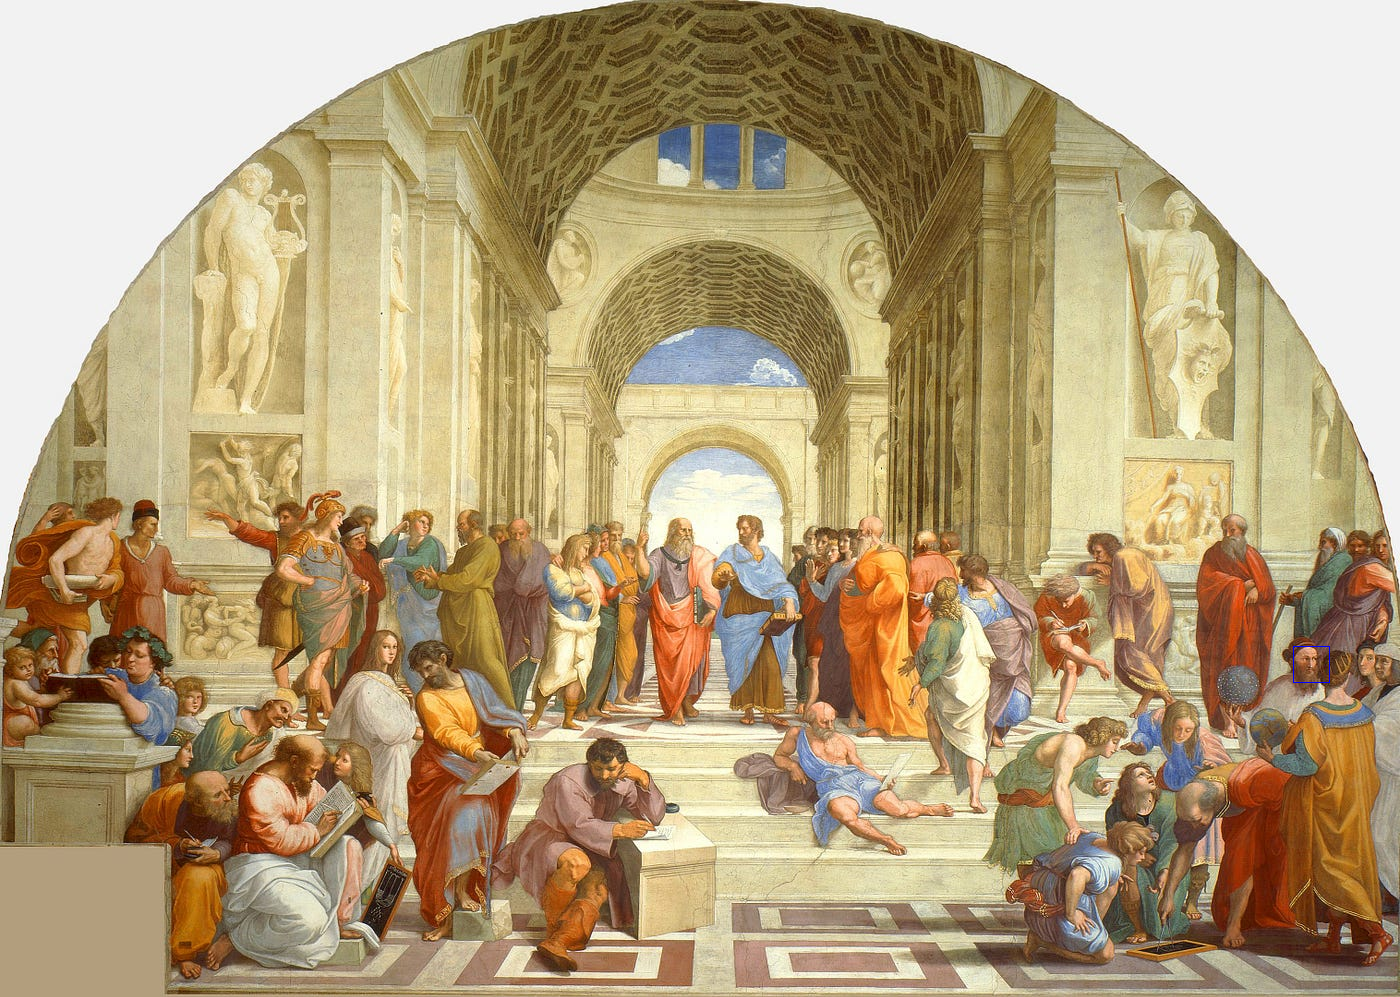

In [31]:
# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    # matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    # name = "Unknown"

    # # Or instead, use the known face with the smallest distance to the new face
    # face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    # best_match_index = np.argmin(face_distances)
    # if matches[best_match_index]:
    #     name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    # text_width, text_height = draw.textsize(name)
    # draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    # draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)